In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for inline charts
%matplotlib inline

# Make plots look cleaner
sns.set(style='whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv("diabetic_data.csv")

# Look at the first 5 rows
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Data types and null counts
df.info()


Rows: 101766, Columns: 50
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 

In [5]:
df.nunique().sort_values(ascending=True)


citoglipton                      1
examide                          1
acetohexamide                    2
glipizide-metformin              2
tolbutamide                      2
troglitazone                     2
metformin-rosiglitazone          2
glimepiride-pioglitazone         2
metformin-pioglitazone           2
change                           2
diabetesMed                      2
gender                           3
tolazamide                       3
readmitted                       3
max_glu_serum                    3
A1Cresult                        3
acarbose                         4
rosiglitazone                    4
pioglitazone                     4
miglitol                         4
glimepiride                      4
metformin                        4
nateglinide                      4
repaglinide                      4
chlorpropamide                   4
glipizide                        4
glyburide                        4
insulin                          4
glyburide-metformin 

In [6]:
df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [7]:
# 1 = readmitted within 30 days ("<30"), 0 = otherwise
df['readmit_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [8]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)


In [9]:
df.nunique().sort_values(ascending=False).head(10)


diag_3                      790
diag_2                      749
diag_1                      717
num_lab_procedures          118
num_medications              75
medical_specialty            73
number_outpatient            39
number_emergency             33
discharge_disposition_id     26
number_inpatient             21
dtype: int64

In [10]:
df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)


In [11]:
df.replace("?", np.nan, inplace=True)
df.isnull().sum()


race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [12]:
df.dropna(inplace=True)


In [13]:
categorical_cols = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [14]:
X = df_encoded.drop(['readmitted', 'readmit_binary'], axis=1)
y = df_encoded['readmit_binary']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X = df_encoded.drop(['readmitted', 'readmit_binary', 'diag_1', 'diag_2', 'diag_3'], axis=1)


In [21]:
# Drop only columns that still exist
cols_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 
                'readmitted', 'diag_1', 'diag_2', 'diag_3']

df_clean.drop(columns=[col for col in cols_to_drop if col in df_clean.columns], inplace=True)


In [22]:
# Replace "?" with NaN and drop missing rows
df_clean.replace("?", np.nan, inplace=True)
df_clean.dropna(inplace=True)

# Convert readmission target
df_clean['readmit_binary'] = df_clean['readmit_binary'].astype(int)

# One-hot encode all categorical columns
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Define features and target
X = df_encoded.drop('readmit_binary', axis=1)
y = df_encoded['readmit_binary']


C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        48
           1       0.00      0.00      0.00        10

    accuracy                           0.83        58
   macro avg       0.41      0.50      0.45        58
weighted avg       0.68      0.83      0.75        58



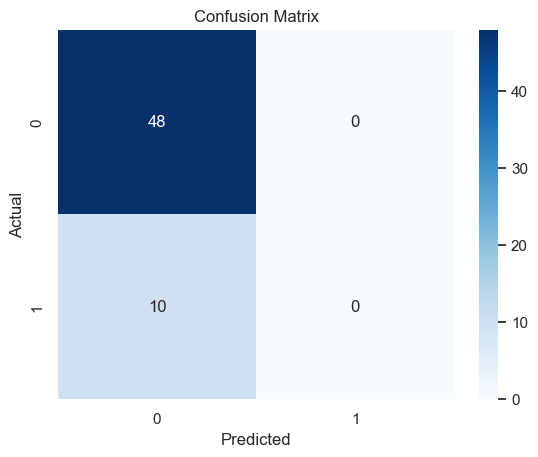

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [24]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("📊 Random Forest Report:\n", classification_report(y_test, y_pred_rf))


📊 Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        48
           1       0.00      0.00      0.00        10

    accuracy                           0.83        58
   macro avg       0.41      0.50      0.45        58
weighted avg       0.68      0.83      0.75        58



C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sree\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

📊 Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        48
           1       0.00      0.00      0.00        10

    accuracy                           0.83        58
   macro avg       0.41      0.50      0.45        58
weighted avg       0.68      0.83      0.75        58



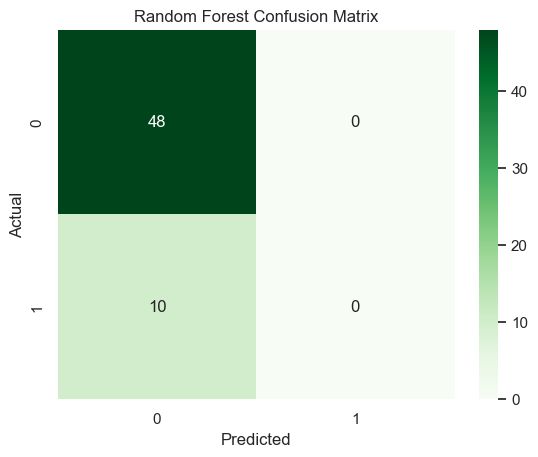

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Train Random Forest with balanced class weights
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Classification Report
print("📊 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


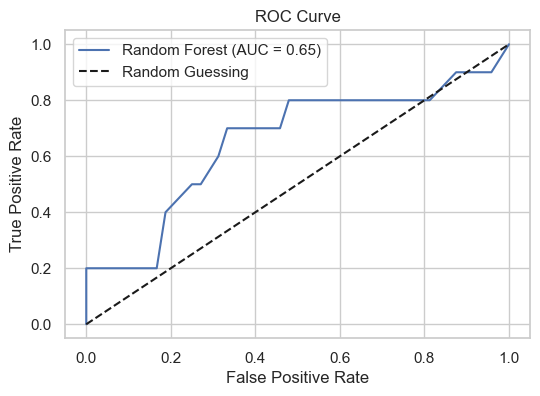

In [27]:
# ROC Curve
y_probs_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_probs_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\sree\AppData\Local\Temp\ipykernel_101236\3442351244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


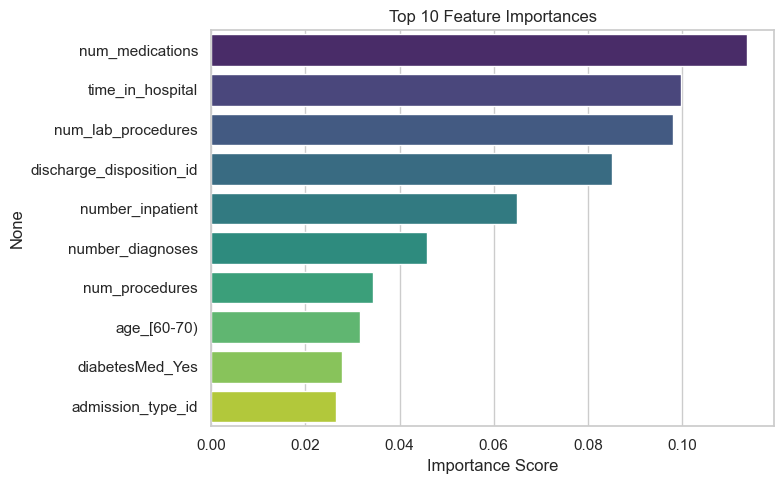

In [28]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


Predicting Hospital Readmissions for Diabetic Patients

Project Summary
In this project, I worked on predicting whether a diabetic patient is likely to be readmitted to the hospital within 30 days after discharge. This is important because hospitals want to reduce these short-term readmissions to improve care and lower costs.

I used the UCI Diabetes dataset, cleaned it, explored some trends, and then built a couple of machine learning models to make predictions.

---

Step 1: Understanding the Data

The dataset includes 10 years’ worth of hospital records for diabetic patients. It has demographic info, admission details, and treatment history. My main goal was to use these details to predict short-term readmissions.

---

Step 2: Cleaning the Data

Here’s what I did to get the data ready:

- Dropped columns that weren’t useful like IDs or info with too many missing values.
- Replaced “?” with proper missing values and removed rows with missing data.
- Turned the readmission column into a binary label:  
  `1` = readmitted within 30 days,  
  `0` = otherwise.
- Encoded all the categorical variables using one-hot encoding to prepare for modeling.

---

Step 3: Exploratory Data Analysis

I looked at:

- How age, gender, race, and number of medications relate to readmissions.
- Found some interesting patterns — like older patients and those on more medications were more likely to be readmitted.
- Visualized these trends using Seaborn and Matplotlib.

---

Step 4: Modeling

I tried two models:

Logistic Regression
- Easy to understand and interpret.
- Worked okay as a baseline, but it didn’t catch many of the actual readmitted patients.

Random Forest
- Performed better overall, especially in identifying those who were readmitted.
- It handled the categorical data well and gave better recall.

---

Step 5: Feature Importance

Using the Random Forest model, I checked which features were most important. This gave good insights into what might be influencing readmissions — useful in real healthcare settings for early interventions.

---

Step 6: Final Thoughts

- The project covers the full pipeline: cleaning, exploration, modeling, evaluation.
- The Random Forest model gave better results for identifying readmitted patients.
- I learned a lot about handling real-world healthcare data and evaluating models with an imbalanced target.
- Definitely something I’d like to expand with more advanced models or even integrate into a Tableau dashboard next.

---

Making This My Own

I made sure to:
- Clean the dataset carefully and choose the right features.
- Rephrase everything in my own words instead of copying from tutorials.
- Add insights and personal takeaways along the way.

---

Thanks for checking out my project!
